## IMPORT LIBRARIES

First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

## IMPORT LIBRARIES

import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import warnings

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, classification_report, silhouette_score


In [ ]:
#Type the above code snippet in this code cell and click Run.
#import pandas................




In [ ]:
#Install seaborn if not installed
!pip install seaborn

## About Dataset
Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:

Customer ID

Gender

Age

Annual Income

Spending Score - Score assigned by the shop, based on customer behavior and spending nature

Profession

Work Experience - in years

Family Size

## LOAD DATASET
We are using pandas to load the data. We will also use pandas next to explore the data both with descriptive statistics and data visualization.


dataset = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Customers-Dataset/main/Customers.csv")

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset=................



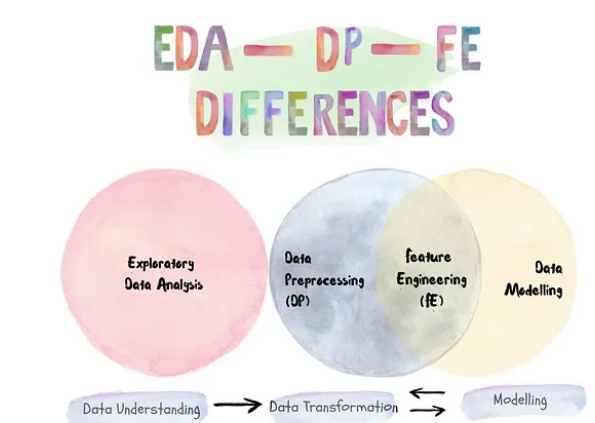

## EDA 

Exploratory Data Analysis is a data analytics process to understand the data in depth and learn the different data characteristics, often with visual means. This allows you to get a better feel of your data and find useful patterns in it. 

#### Summarize the Dataset
Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:

    1.Dimensions of the dataset.
    2.Peek at the data itself.
    3.Statistical summary of all attributes.
    4.Breakdown of the data by the class variable.
Don’t worry, each look at the data is one command. These are useful commands that you can use again and again on future projects.

#### Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.


#### Shape
The DataFrame.shape attribute in Pandas enables us to obtain the shape of a DataFrame. For example, if a DataFrame has a shape of (80, 10) , this implies that the DataFrame is made up of 80 rows and 10 columns of data.

dataset.shape

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................



dataset.head()

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................


dataset.tail()

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................



### Statistical Summary
Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.




dataset.info()

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................



dataset.describe()

In [ ]:
#Type the above code snippet in this code cell and click Run.
#dataset................



## Univariate Analysis
Univariate analysis is the simplest form of analysis where we explore a single variable. Univariate analysis is performed to describe the data in a better way. We perform Univariate analysis of Numerical and categorical variables differently because plotting uses different plots.

#### Categorical Data
##### CountPlot

Countplot is basically a count of frequency plot in form of a bar graph. It plots the count of each category in a separate bar. When we use the pandas’ value counts function on any column, It is the same visual form of the value counts function. 


##### Seaborn
Python Seaborn library is a widely popular data visualization library that is commonly used for data science and machine learning tasks. You build it on top of the matplotlib data visualization library and can perform exploratory analysis.

!pip install seaborn

import seaborn as sns

sns.countplot(x = 'Profession', data=dataset, order = dataset['Profession'].value_counts().index)

In [ ]:
#Type the above code snippet in this code cell and click Run.
#import seaborn................




##### Pie Chart

The pie chart is also the same as the countplot, only gives you additional information about the percentage presence of each category in data, means which category is getting how much weightage in data. If we check the Gender column we get an overview about the male and female shoppers.

dataset['Gender'].value_counts().plot(kind="pie", autopct="%.2f")

plt.show()

In [ ]:
#Type the above code snippet in this code cell and click Run.
#import dataset['Gender']................




#### Numerical Data

##### Histogram

A histogram is a value distribution plot of numerical columns. It basically creates bins in various ranges in values and plots it where we can visualize how values are distributed. We can have a look where more values lie like in positive, negative, or at the center(mean).

plt.hist(dataset['Age'], bins=10)

plt.show()

In [ ]:
#Type the above code snippet in this code cell and click Run.
# plt.hist................



##### Histplot

Histplot is also known as the second Histogram because it is a slight improvement version of the Histogram. Distplot gives us a KDE(Kernel Density Estimation) over histogram which explains PDF(Probability Density Function) which means what is the probability of each value occurring in this column. If you have study statistics before then definitely you should know about PDF function.

sns.histplot(data=dataset, x='Spending_Score',color='pink',kde=True)

In [1]:
#Type the above code snippet in this code cell and click Run.
# sns.histplot................


In [ ]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)

plt.show()

## Bivariate/ Multivariate Analysis
We dicussed about various plots to explore single categorical and numerical data. Bivariate Analysis is used when we have to explore the relationship between 2 different variables and we have to do this because, in the end, our main task is to explore the relationship between variables to build a powerful model. And when we analyze more than 2 variables together then it is known as Multivariate Analysis. we will work on different plots for Bivariate as well on Multivariate Analysis.

#### Numerical and Numerical
First, let’s explore the plots when both the variable is numerical.

###### Scatter Plot
To plot the relationship between two numerical variables scatter plot is a simple plot to do. Let us see the relationship between the total bill and tip provided using a scatter plot.

In [ ]:
sns.scatterplot(data=dataset,x=dataset["Spending_Score"], y=dataset["Annual_Income"], hue=dataset["Gender"])
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(dataset, hue="Work_Experience", height=2)
plt.show()

In [ ]:
sns.jointplot(data=dataset, x='Age', y='Annual_Income',color='purple')

In [ ]:
sns.barplot(data=dataset, x='Work_Experience',y='Annual_Income',ci=None)

In [ ]:
sns.countplot(x = 'Spending_Category', data=dataset, order = dataset['Spending_Category'].value_counts().index)

# DATA ENGINEERING

In [ ]:
dataset.head()

In [ ]:
dataset=dataset.drop(['CustomerID'], axis=1)

In [ ]:
dataset = dataset.drop(['Spending_Score', 'Invoice_Number'], axis=1)

In [ ]:
dataset.groupby('Spending_Category').size()

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
ds_low = dataset[(dataset['Spending_Category']=="Low")] 
ds_average = dataset[(dataset['Spending_Category']=="Average")] 
ds_high = dataset[(dataset['Spending_Category']=="High")]
# upsample minority class
ds_average_upsampled = resample(ds_average, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1017, # to match majority class
                                 random_state=42)  # reproducible results
ds_low_upsampled = resample(ds_low, 
                                 replace=True,    # sample with replacement
                                 n_samples= 1017, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
ds = pd.concat([ds_average_upsampled,ds_low_upsampled, ds_high])

In [ ]:
ds.groupby('Spending_Category').size()

In [ ]:
ds.duplicated().sum()

In [ ]:
sns.countplot(x = 'Spending_Category', data=ds, order = dataset['Spending_Category'].value_counts().index)

In [ ]:
ds.isnull().sum()

In [ ]:
ds["Profession"].fillna("Unknown", inplace=True)

In [ ]:
ds.isnull().sum()

In [ ]:
ds

In [ ]:
sns.countplot(x = 'Profession', data=ds, order = ds['Profession'].value_counts().index)

In [ ]:
ds['Profession'].unique()

In [ ]:
prof = {"Marketing":0,'Lawyer':1, 'Executive':2, 'Entertainment':3, 'Healthcare':4,
       'Engineer':5, 'Artist':6, 'Doctor':7, 'Unknown':8, 'Homemaker':9}
ds['Profession'] = ds['Profession'].map(prof)

In [ ]:
ds.head()

In [ ]:
ds['Gender'].unique()

In [ ]:
gender = {"Male":0,'Female':1}
ds['Gender'] = dataset['Gender'].map(gender)

In [ ]:
ds.head()

In [ ]:
scaled_ds = ds[['Gender', 'Age', 'Annual_Income', 'Profession', 'Work_Experience','Family Size']]

In [ ]:
scaler=StandardScaler()
scaled_features = scaler.fit_transform(scaled_ds)

In [ ]:
scaled_ds

# DATA MODELLING & EVALUATION 

In [ ]:
x = ds.iloc[:,0:6].values
y = ds.iloc[:,6].values

In [ ]:
x

In [ ]:
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

#### Logistic Regression

In [ ]:
model_lr = LogisticRegression(max_iter = 600)

In [ ]:
model_lr.fit(x_train, y_train)

In [ ]:
y_pred_lr = model_lr.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

#### K Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = KNeighborsClassifier()

In [ ]:
model_knn.fit(x_train,y_train)

In [ ]:
y_pred_knn = model_knn.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()

In [ ]:
model_dt.fit(x_train,y_train)

In [ ]:
y_pred_dt = model_dt.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

#### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_nb = GaussianNB()

In [ ]:
model_nb.fit(x_train,y_train)

In [ ]:
y_pred_nb = model_nb.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC(gamma='auto')

In [ ]:
model_svc.fit(x_train,y_train)

In [ ]:
y_pred_svc = model_nb.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [ ]:
model_rf.fit(x_train,y_train)

In [ ]:
y_pred_rf = model_nb.predict(x_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

### Prediction

In [ ]:
Xnew = [[1,24,15000,0,2,5]]

ynew = model_dt.predict(Xnew)

print(ynew)

In [ ]:
y_test

In [ ]:
y_pred_dt

### DATA ANALYTICS

In [ ]:
l1 = list(y_test)
l2 = list(y_pred_dt)

In [ ]:
pred = {}
for i, score in enumerate(l1):
  pred[i] = score

In [ ]:
pred1 = {}
for i, score in enumerate(l2):
  pred1[i] = score

In [ ]:
dct={'y_test':pred , 'y_pred_dt': pred1}

In [ ]:
data = pd.DataFrame(dct)

In [ ]:
data.to_excel("output.xlsx")